In [2]:
#Load metadata
import pandas as pd


train_df = pd.read_csv('../data/raw/2024/train_metadata.csv')
ground_df = pd.read_csv("../data/raw/truth?/species-trait-dat.csv")


In [3]:
ground_df.head()

,scientific_name,common_name,species_annotation_codes,eBird_codes,habitat,habit
0,Dicrurus leucophaeus,Ashy Drongo,AD,ASDR,RF,CAN
1,Muscicapa dauurica,Asian Brown Flycatcher,ABF,ABFL,OC,MID
2,Chalcophaps indica,Asian Emerald Dove,AED,AEDO,RF,GRD
3,Irena puella,Asian Fairy-bluebird,AFB,AFBL,RF,CAN
4,Eudynamys scolopaceus,Asian Koel,AK,ASKO,OC,MID


In [15]:
ground_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   scientific_name           116 non-null    object
 1   common_name               116 non-null    object
 2   species_annotation_codes  116 non-null    object
 3   eBird_codes               116 non-null    object
 4   habitat                   116 non-null    object
 5   habit                     116 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [4]:
train_df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


In [16]:
#Match


matched = pd.merge(left=ground_df, right=train_df[["primary_label", "scientific_name"]], how='lef', on="scientific_name")

In [25]:
#Drop duplicates
matched = matched.drop_duplicates(subset=["primary_label", "scientific_name"])

#Get nan part
nan_part = matched[matched["primary_label"].isna()]

#non nan part
non_nan_part = matched[matched["primary_label"].notna()]

In [23]:
nan_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 267 to 9850
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   scientific_name           11 non-null     object
 1   common_name               11 non-null     object
 2   species_annotation_codes  11 non-null     object
 3   eBird_codes               11 non-null     object
 4   habitat                   11 non-null     object
 5   habit                     11 non-null     object
 6   primary_label             0 non-null      object
dtypes: object(7)
memory usage: 704.0+ bytes


In [26]:
non_nan_part.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 9820
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   scientific_name           105 non-null    object
 1   common_name               105 non-null    object
 2   species_annotation_codes  105 non-null    object
 3   eBird_codes               105 non-null    object
 4   habitat                   105 non-null    object
 5   habit                     105 non-null    object
 6   primary_label             105 non-null    object
dtypes: object(7)
memory usage: 6.6+ KB


In [30]:
non_nan_part.head(110)

,scientific_name,common_name,species_annotation_codes,eBird_codes,habitat,habit,primary_label
0,Dicrurus leucophaeus,Ashy Drongo,AD,ASDR,RF,CAN,ashdro1
109,Muscicapa dauurica,Asian Brown Flycatcher,ABF,ABFL,OC,MID,asbfly
214,Chalcophaps indica,Asian Emerald Dove,AED,AEDO,RF,GRD,emedov2
268,Eudynamys scolopaceus,Asian Koel,AK,ASKO,OC,MID,asikoe2
543,Hemipus picatus,Bar-winged Flycatcher-shrike,BWFS,BWFS,RF,CAN,bwfshr1
...,...,...,...,...,...,...,...
9349,Amaurornis phoenicurus,White-breasted Waterhen,WBWH,WBWA,OC,AQU,whbwat1
9516,Psilopogon viridis,White-cheeked Barbet,WCB,WCBA,RF,CAN,whcbar1
9572,Lonchura striata,White-rumped Munia,WRM,WRMU,OC,UND,whrmun
9635,Halcyon smyrnensis,White-throated Kingfisher,WTK,WTKI,OC,AQU,whtkin2


In [33]:
(non_nan_part["primary_label"] == "grtdro1").any()

True

In [44]:
import numpy as np

#Load in sample weights
sample_weights = np.load("../data/raw/sample_weights_2024.npy")
classes = train_df["primary_label"].unique()
weight_dict = dict(zip(classes, sample_weights))
weight_avg = np.mean(sample_weights)
print(weight_avg)

23.05086804091042


In [45]:
#Add weight based on primary label
non_nan_part["sample_weight"] = non_nan_part["primary_label"].map(weight_dict)

/tmp/ipykernel_17780/1026934549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_part["sample_weight"] = non_nan_part["primary_label"].map(weight_dict)


In [46]:
non_nan_part.head()

,scientific_name,common_name,species_annotation_codes,eBird_codes,habitat,habit,primary_label,sample_weight
0,Dicrurus leucophaeus,Ashy Drongo,AD,ASDR,RF,CAN,ashdro1,14.979803
109,Muscicapa dauurica,Asian Brown Flycatcher,ABF,ABFL,OC,MID,asbfly,15.262466
214,Chalcophaps indica,Asian Emerald Dove,AED,AEDO,RF,GRD,emedov2,21.482331
268,Eudynamys scolopaceus,Asian Koel,AK,ASKO,OC,MID,asikoe2,9.430897
543,Hemipus picatus,Bar-winged Flycatcher-shrike,BWFS,BWFS,RF,CAN,bwfshr1,28.089144


In [47]:
non_nan_part["lowerthan"] = non_nan_part["sample_weight"] < weight_avg

/tmp/ipykernel_17780/1454235342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_part["lowerthan"] = non_nan_part["sample_weight"] < weight_avg


<Axes: xlabel='sample_weight', ylabel='primary_label'>

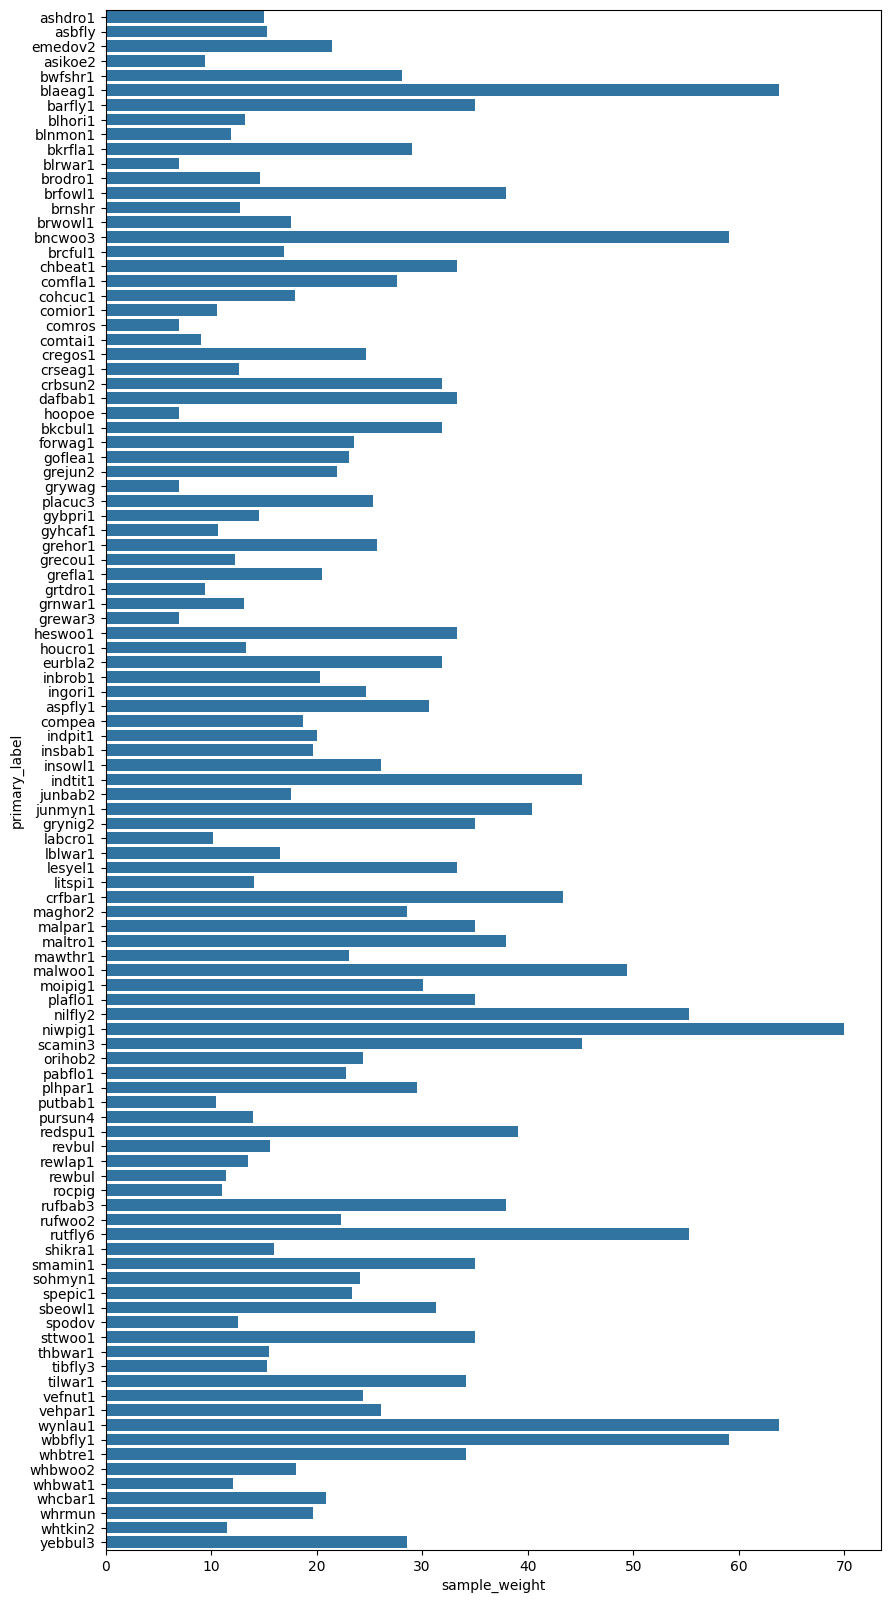

In [53]:
#Show barplot of sample weights
import seaborn as sns
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize=(10, 20))
sns.barplot(y="primary_label", x="sample_weight", data=non_nan_part)

25.15122798960919

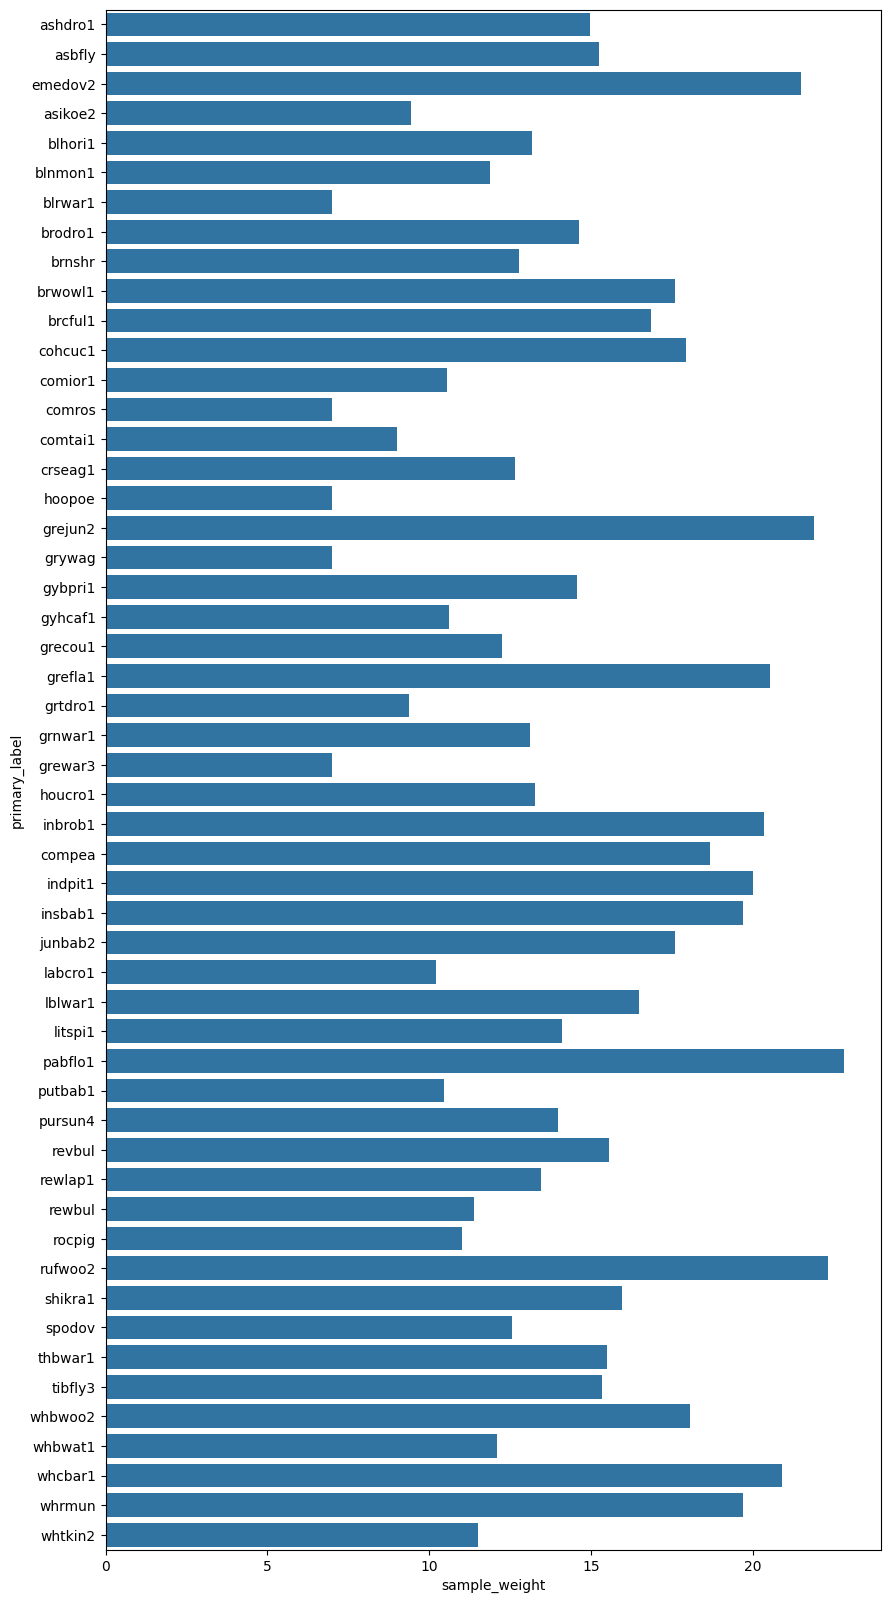

In [55]:
#Show barplot of sample weights
import seaborn as sns
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize=(10, 20))
sns.barplot(y="primary_label", x="sample_weight", data=non_nan_part[non_nan_part["lowerthan"] == True])

#Calc avg weight of non nan part
non_nan_part["sample_weight"].mean()


In [71]:
#Get classes that are not in primary label
primary_classes = non_nan_part["primary_label"].unique()

not_in_primary = list(set(classes) - set(primary_classes))
#Calculate avg weight of not in primary classes




In [74]:
#Calculate avg weight of not in primary classes
not_in_primary_weights = [weight_dict[cls] for cls in not_in_primary]
not_in_primary_avg = np.mean(not_in_primary_weights)
not_in_primary_avg

20.186740838139375

In [75]:
non_nan_part["sample_weight"].mean()

25.15122798960919

In [76]:
#Get 2024 add metadata
add_meta = pd.read_csv("../data/raw/2024add/train_metadata.csv")

In [80]:
mergeadd = pd.merge(left=non_nan_part[["primary_label"]], right=add_meta,  how='inner', on="primary_label")
print(len(mergeadd) / len(add_meta))

0.2331877369375309


In [81]:
merge2024 = pd.merge(left=non_nan_part[["primary_label"]], right=train_df,  how='inner', on="primary_label")
print(len(merge2024) / len(train_df))

0.40230589966883357


In [82]:
#Write non nan to file
non_nan_part.to_csv("../data/raw/truth?/105.csv", index=False)

We know:

The 105 overlapping birds have generally less represented in Xeno canto. In the additional 2024 data, they are more rare than our 2024 data.


## Chapter 2: Central India vs Western Ghats


In [83]:
#Load metadata
import pandas as pd


train_df = pd.read_csv('../data/raw/2024/train_metadata.csv')
western_df = pd.read_csv("../data/raw/truth?/western_ghats.csv")
central_df = pd.read_csv("../data/raw/truth?/central_india.csv")

In [84]:
train_no_dupes_df = train_df.drop_duplicates(subset=["primary_label"])

In [94]:
# Now lets merge the dataframes to train_no_dupes_df based on scientific name

merge1_df = pd.merge(left=train_no_dupes_df, right=western_df, how='inner', on="scientific_name")
merge2_df = pd.merge(left=train_no_dupes_df, right=central_df, how='inner', left_on="scientific_name", right_on="Scientific_Name")


In [95]:
merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   primary_label           85 non-null     object 
 1   secondary_labels        85 non-null     object 
 2   type                    85 non-null     object 
 3   latitude                82 non-null     float64
 4   longitude               82 non-null     float64
 5   scientific_name         85 non-null     object 
 6   common_name             85 non-null     object 
 7   author                  85 non-null     object 
 8   license                 85 non-null     object 
 9   rating                  85 non-null     float64
 10  url                     85 non-null     object 
 11  filename                85 non-null     object 
 12  Uniqueid                85 non-null     int64  
 13  Common_Name             85 non-null     object 
 14  Scientific_Name         85 non-null     obje

In [99]:
merge1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   primary_label             105 non-null    object 
 1   secondary_labels          105 non-null    object 
 2   type                      105 non-null    object 
 3   latitude                  99 non-null     float64
 4   longitude                 99 non-null     float64
 5   scientific_name           105 non-null    object 
 6   common_name_x             105 non-null    object 
 7   author                    105 non-null    object 
 8   license                   105 non-null    object 
 9   rating                    105 non-null    float64
 10  url                       105 non-null    object 
 11  filename                  105 non-null    object 
 12  common_name_y             105 non-null    object 
 13  species_annotation_codes  105 non-null    object 
 14  eBird_code

In [100]:
#Merge1 and merge2 using outer
merge3_df = pd.merge(left=merge1_df, right=merge2_df, how='outer', on="primary_label")

In [101]:
merge3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   primary_label             138 non-null    object 
 1   secondary_labels_x        105 non-null    object 
 2   type_x                    105 non-null    object 
 3   latitude_x                99 non-null     float64
 4   longitude_x               99 non-null     float64
 5   scientific_name_x         105 non-null    object 
 6   common_name_x             105 non-null    object 
 7   author_x                  105 non-null    object 
 8   license_x                 105 non-null    object 
 9   rating_x                  105 non-null    float64
 10  url_x                     105 non-null    object 
 11  filename_x                105 non-null    object 
 12  common_name_y             105 non-null    object 
 13  species_annotation_codes  105 non-null    object 
 14  eBird_code